# OpenET GEESEBAL
## Image Class Property/Method Example
This example shows how to instantiate the model Image class for a single Landsat image using the ".from_landsat_c1_sr()" helper method.  This example also shows how to get the model variables.

## Setup

In [1]:
import pprint

import ee
from IPython.display import Image

import openet.geesebal as model
print(model)
# reinstall geesebal-branch model in anaconda prompt after changes:
# pip install --upgrade --force-reinstall git+https://github.com/et-brasil/openet-geesebal.git@openET_international


<module 'openet.geesebal' from 'C:\\ProgramData\\Miniconda3\\lib\\site-packages\\openet\\geesebal\\__init__.py'>


### Initialize Earth Engine

In [2]:
# Initialize the Earth Engine package, initiating the authentication flow if needed.
try:
    ee.Initialize()
except ee.EEException:
    ee.Authenticate()
    ee.Initialize()

## Analysis

In [3]:
ndvi_palette = ['#EFE7E1', '#003300']
et_palette = [
    'DEC29B', 'E6CDA1', 'EDD9A6', 'F5E4A9', 'FFF4AD', 'C3E683', '6BCC5C', 
    '3BB369', '20998F', '1C8691', '16678A', '114982', '0B2C7A']
viridis_palette = ['440154', '433982', '30678D', '218F8B', '36B677', '8ED542', 'FDE725']

image_size = 1000

### Landsat 8 Collection 1 SR Image

In [4]:
landsat_img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_044033_20170801')
landsat_crs = landsat_img.select('B3').projection().getInfo()['crs']

landsat_img = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_038031_20130828')
landsat_img = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_044033_20170716')

# test for Brazil
landsat_img = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_220069_20210813')

landsat_crs = landsat_img.select('SR_B3').projection().getInfo()['crs']

landsat_region = landsat_img.geometry().bounds(1, 'EPSG:4326')
landsat_dt = ee.Date(landsat_img.get('system:time_start'))
# print(landsat_img.get('system:time_start').getInfo())

In [5]:
# image_url = landsat_img.select(['B4', 'B3', 'B2'])\
#     .multiply([0.0001, 0.0001, 0.0001])\
#     .getThumbURL({'min': 0.0, 'max': 0.3, 
#                   'region': landsat_region, 'dimensions': image_size})
# Image(image_url, embed=True, format='png')

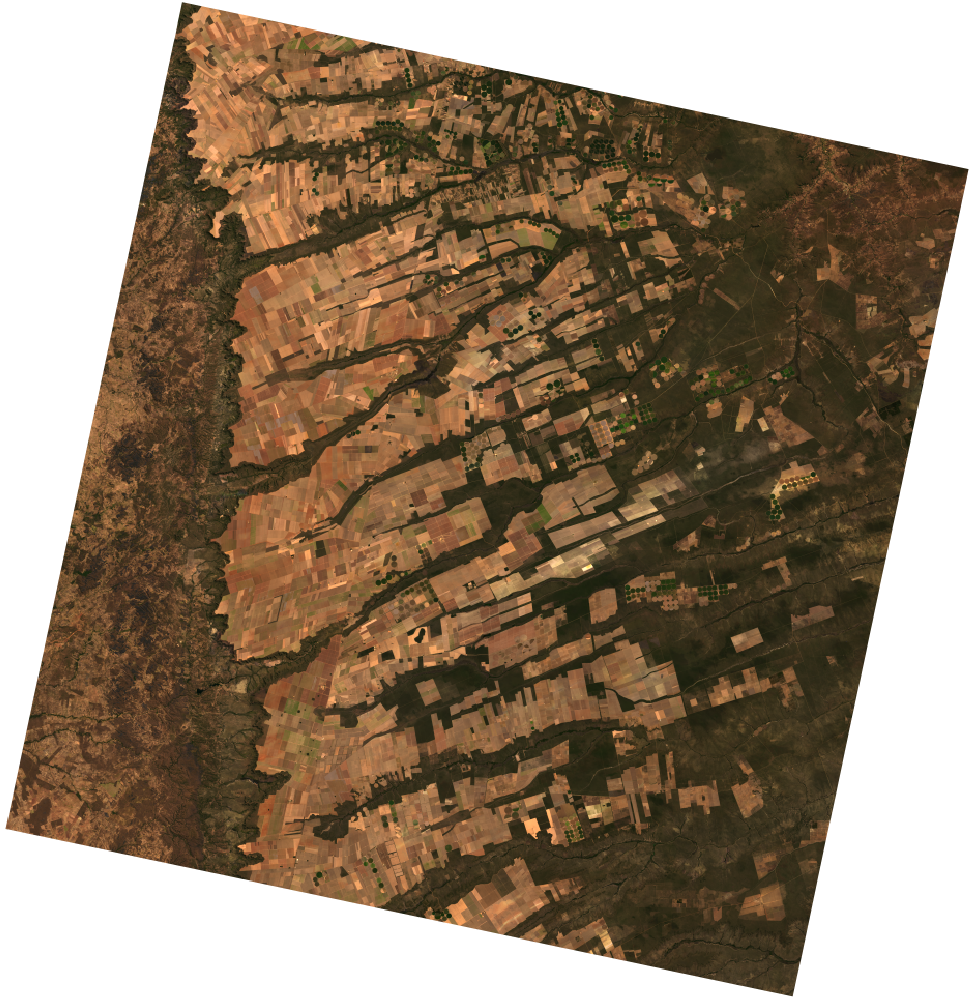

In [6]:
# Uncomment for Collection 2
image_url = landsat_img.select(['SR_B4', 'SR_B3', 'SR_B2'])\
    .multiply([0.0000275, 0.0000275, 0.0000275])\
    .add([-0.2, -0.2, -0.2])\
    .getThumbURL({'min': 0.0, 'max': 0.3, 
                  'region': landsat_region, 'dimensions': image_size})
Image(image_url, embed=True, format='png')


In [7]:
# Build the geeSEBAL object from the Landsat image
model_obj = model.Image.from_landsat_c2_sr(
    landsat_img, 
    # et_reference_source='projects/climate-engine/cimis/daily', 
    # et_reference_band='ETr_ASCE',
    # et_reference_source='IDAHO_EPSCOR/GRIDMET', 
    # et_reference_band='etr', 
    # chang between sa or na depending on location
    meteorology_source_daily='projects/openet/assets/meteorology/era5land/sa/daily',
    et_reference_source='projects/openet/assets/meteorology/era5land/sa/daily', 
    et_reference_band='etr_asce', 
    #et_reference_factor=0.85,
    et_reference_resample='bilinear',
)

In [8]:
# pprint.pprint(model_obj.__dict__)

### NDVI

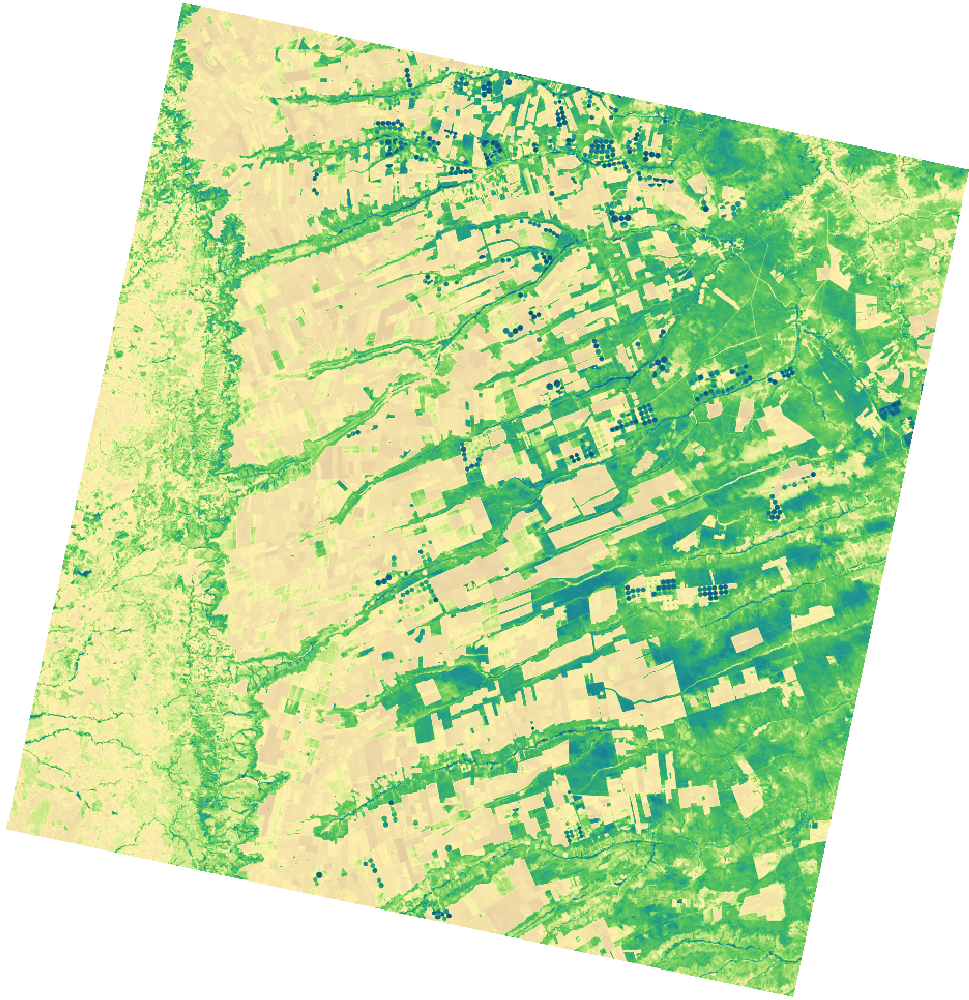

In [9]:
image_url = model_obj.ndvi\
    .getThumbURL({'min': 0, 'max': 1, 'palette': et_palette, 
                  'region': landsat_region, 'dimensions': image_size})
Image(image_url, embed=True, format='png')

### ET fraction

In [ ]:
image_url = model_obj.et_fraction\
    .getThumbURL({'min': 0.0, 'max': 1, 'palette': ['red','yellow','blue'], 
                  'region': landsat_region, 'dimensions': image_size})
Image(image_url, embed=True, format='png')

### Reference ET

In [ ]:
# Clip and project to the Landsat image footprint and coordinate system
image_url = model_obj.et_reference\
    .getThumbURL({'min': 0, 'max': 10, 'palette': et_palette, 
                  'region': landsat_region, 'dimensions': image_size})
Image(image_url, embed=True, format='png')

### ET

In [ ]:
image_url = model_obj.et\
    .getThumbURL({'min': 0, 'max': 10, 'palette': ['red','yellow','blue'], 
                  'region': landsat_region, 'dimensions': image_size})
Image(image_url, embed=True, format='png')

### "Calculate" Method

Return a multiband image of the model variables

In [ ]:
# image_url = model_obj.calculate(['et', 'et_fraction']).select(['et'])\
#     .getThumbURL({'min': 5, 'max': 10, 'palette': et_palette, 
#                   'region': landsat_region, 'dimensions': image_size})
# Image(image_url, embed=True, format='png')